In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl
from utilities_LLR import *
font = {'size'   : 14}
mpl.rc('font', **font)
plt.ion()

# parameters & load data

In [2]:
Nf = 200000
Np = 600000
kbar0 = 0.01
n = 5.
R = 1
fn = 'kbar_'+str(kbar0)+'beta'+str(1./n)+'_Np_'+str(Np)+'_Nf_'+str(Nf)+'_R_'+str(R)+'.npz'   

data = np.load(fn)
ps = data['ps'][()]

# below shows an example of nk dependence

In [3]:
nphots = np.arange(2, 7)
betas_LLR = np.zeros((len(nphots), 2))
for i, nphot in enumerate(nphots):
    betas_LLR[i], chi2, betas = getContrast_beta(ps.transpose(), Np, beta2 = 0.3, nphot = nphot,  beta1 = 0.1)
    print ("n_k = {}, extracted contrast and the error {}, {}".format(nphot, betas_LLR[i,0], betas_LLR[i,1]))

n_k = 2, extracted contrast and the error 0.157, 0.00031554085060565807
n_k = 3, extracted contrast and the error 0.199, 0.0003186106852698036
n_k = 4, extracted contrast and the error 0.2, 0.0003185923147850953
n_k = 5, extracted contrast and the error 0.2, 0.0003185827437492289
n_k = 6, extracted contrast and the error 0.2, 0.00031858218108463555


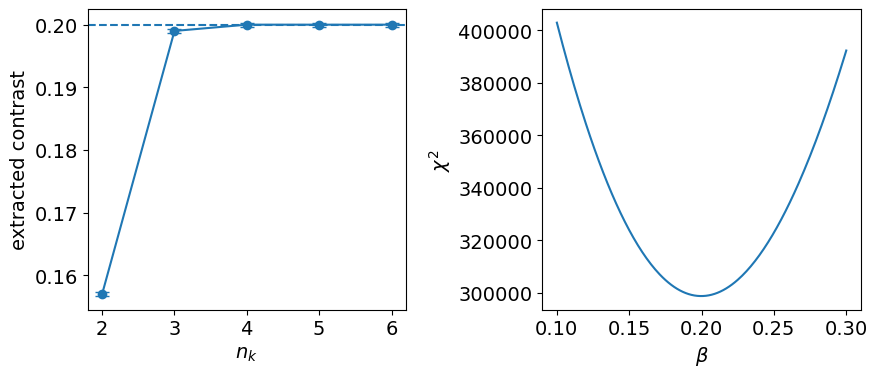

In [4]:
plt.figure(figsize = (9,4))
plt.subplot(121)
plt.errorbar(nphots, betas_LLR[:,0], yerr = betas_LLR[:,1], fmt = 'o-', capsize = 5)
plt.xlabel('$n_k$')
plt.ylabel('extracted contrast')
plt.axhline(0.2, ls = '--')
plt.subplot(122)
plt.plot(betas, chi2)
plt.ylabel(r'$\chi^2$')
plt.xlabel(r'$\beta$')
plt.tight_layout()